# Pulling Album Catalog Data from Remote MySQL Database

By Michael Gonzalez

I was tasked to retrieve album catalog data from a remote MySQL database. Once I acquired the data, I will take a look at the overall structure and convert it to DataFrames. When the data is in a DataFrame, it will be easier to perform some exploratory data analysis. During the analysis, I will look at the Song database and find the longest songs. I will use MySQL functions, such as JOIN, GROUPBY and HAVING. I will also create data visualizations of the overall ablums counts and albums with higher counts listed. 

In [11]:
# Importing the needed libraries

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


I used the mysql connector library to connect to the remote MySQL database. I also used pandas to convert MySQL to a DataFrame and matplotlib.pyplot to create charts.

## Explortary Data Analysis

In [2]:
# Connecting to the remote MySQL database for the albums data and convert it to a DataFrame

mydb = mysql.connector.connect(
    host = "**********",
    user = "*********",
    password = "*********",
    database = "*********"
)

mycursor = mydb.cursor()

sql = "SELECT * FROM albums ORDER BY name DESC"

albums_df = pd.read_sql(sql, con = mydb)

albums_df.head(5)

,id,name,release_year,band_id
0,23,Tribe of Force,2010,10
1,6,Tiara,2018,5
2,16,The Unforgiving,2011,8
3,18,The Sound of Perseverance,1998,9
4,1,The Number of the Beasts,1982,1


In [3]:
# Connecting to the remote MySQL database for the bands data and convert it to a DataFrame

sql = "SELECT * FROM bands ORDER BY name DESC"

bands_df = pd.read_sql(sql, con = mydb)

bands_df.head(5)

,id,name
0,8,Within Temptation
1,10,Van Canto
2,7,The Ocean
3,5,Seventh Wonder
4,12,Nine Inch Nails


In [4]:
# Performing a MySQL Left Join function to combine the albums and bands DataFrames

sql = "SELECT * FROM bands LEFT JOIN albums ON bands.id = albums.band_id"

lf_join_df = pd.read_sql(sql, con = mydb)

lf_join_df.head(10)

,id,name,id,name,release_year,band_id
0,1,Iron Maiden,1.0,The Number of the Beasts,1982.0,1.0
1,1,Iron Maiden,2.0,Power Slave,1984.0,1.0
2,2,Deuce,3.0,Nightmare,2018.0,2.0
3,3,Avenged Sevenfold,4.0,Nightmare,2010.0,3.0
4,4,Ankor,NaN,None,NaN,NaN
5,5,Seventh Wonder,6.0,Tiara,2018.0,5.0
6,5,Seventh Wonder,7.0,The Great Escape,2010.0,5.0
7,5,Seventh Wonder,8.0,Mercy Falls,2008.0,5.0
8,6,Metallica,9.0,Master of Puppets,1986.0,6.0
9,6,Metallica,10.0,...And Justice for All,1988.0,6.0


After pulling data from the remote MySQL database and converting it to useful DataFrames. I performed some basic MySQL functions to combine two databases into one. Now I want to a look at the songs database and find out the longest songs.

In [5]:
# Looking at the songs database and convert it to a DataFrame

sql = "SELECT * FROM songs ORDER BY name DESC"


songs_df = pd.read_sql(sql, con = mydb)

songs_df.head(5)

,id,name,length,album_id
0,15,Wiseman,5.70000,7
1,24,Welcome to Mercy Falls,5.18333,8
2,40,Welcome Home (Sanitarium),6.45000,9
3,6,Victorious,4.91667,6
4,25,Unbreakable,7.31667,8


In [6]:
# Using the JOIN and GROUPBY SQL Functions to find the longest songs

sql = """SELECT albums.name AS 'Albums',
             albums.release_year AS 'Release Year',
             MAX(songs.length) AS 'Duration'
         FROM albums
         JOIN songs ON albums.id = songs.album_id
         GROUP BY songs.album_id
      """


long_songs_df = pd.read_sql(sql, con = mydb)

long_songs_df

,Albums,Release Year,Duration
0,Tiara,2018,9.50000
1,The Great Escape,2010,30.23330
2,Mercy Falls,2008,9.48333
3,Master of Puppets,1986,8.58333


The longest song is a little over 30 minutes from an album titled "The Great Escape". It is followed by two songs that are about 9.5 minutes long. 

## Data Visualizations

Now in this section, I will use more MySQL functions to find the overall count of albums. I also want to find the bands that have more than one album listed in the DataFrame. There will be corresponding charts to these queries.

In [7]:
# Using MySQL AggFunction, Alias tables, GROUPBY and COUNT of the DataFrame

sql = """SELECT b.name AS band_name, COUNT(a.id) AS num_albums
         FROM bands AS b
         LEFT JOIN albums AS a ON b.id = a.band_id
         GROUP BY b.id"""

count_df = pd.read_sql(sql, con = mydb)

count_df

,band_name,num_albums
0,Iron Maiden,2
1,Deuce,1
2,Avenged Sevenfold,1
3,Ankor,0
4,Seventh Wonder,3
5,Metallica,3
6,The Ocean,3
7,Within Temptation,3
8,Death,3
9,Van Canto,3


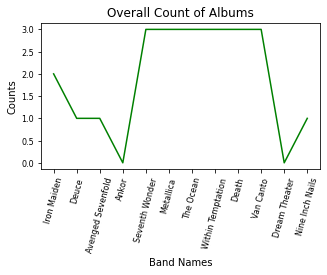

In [8]:
# Creating a line chart of the overall albums count

fig, ax = plt.subplots(figsize = (5, 2.7))
ax.plot('band_name', 'num_albums', color = 'g', data = count_df)
plt.xticks(rotation = 75)
ax.tick_params(labelsize = 8)
ax.set_xlabel('Band Names')
ax.set_ylabel('Counts')
ax.set_title('Overall Count of Albums');

In [9]:
# Looking for ablums that have more than one listed 
# Using the HAVING MySQL function

sql = """SELECT b.name AS band_name, COUNT(a.id) AS num_albums
         FROM bands AS b
         LEFT JOIN albums AS a ON b.id = a.band_id
         GROUP BY b.id
         HAVING num_albums > 1"""

three_count_df = pd.read_sql(sql, con = mydb)

three_count_df

,band_name,num_albums
0,Iron Maiden,2
1,Seventh Wonder,3
2,Metallica,3
3,The Ocean,3
4,Within Temptation,3
5,Death,3
6,Van Canto,3


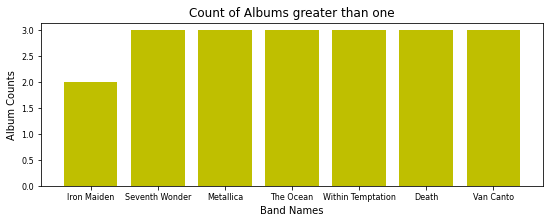

In [10]:
# Creating a bar chart of albums listed more than one

fig, ax = plt.subplots(figsize = (9, 3))
plt.bar('band_name', 'num_albums', color = 'y', data = three_count_df)
ax.tick_params(labelsize = 8)
ax.set_xlabel('Band Names')
ax.set_ylabel('Album Counts')
ax.set_title('Count of Albums greater than one');